# Class 12: Data visualization continued

Plan for today:
- Review and continuaton of data visualization using matplotlib
- If there is time: Data visualization using seaborn


## Notes on the class Jupyter setup

If you have the *ydata123_2023e* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook).  

In [3]:
import YData

# YData.download.download_class_code(12)   # get class code    
# YData.download.download_class_code(12, TRUE) # get the code with the answers 

#YData.download.download_data("dow.csv")
YData.download.download_data("monthly_egg_prices.csv")
YData.download.download_data("monthly_wheat_prices.csv")
YData.download_data("US_Gasoline_Prices_Weekly.csv")
YData.download.download_data("nba_salaries_2015_16.csv")


There are also similar functions to download the homework:

In [40]:
# YData.download.download_homework(5)  # downloads the homework 

If you are using colabs, you should install polars and the YData packages by uncommenting and running the code below.

In [41]:
# !pip install https://github.com/emeyers/YData_package/tarball/master

If you are using google colabs, you should also uncomment and run the code below to mount the your google drive

In [42]:
# from google.colab import drive
# drive.mount('/content/drive')

In [60]:
import pandas as pd
import statistics
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

## Data visualization continued!

Let's start with some review of the data visualization we discussed last class.

The code below creates a DataFrame called `prices` that has the weekly prices of a gallon of Gas, a dozen Eggs and ton of Wheat. 

In [61]:
egg_prices = pd.read_csv("monthly_egg_prices.csv", parse_dates = [0])
gas_prices = pd.read_csv("US_Gasoline_Prices_Weekly.csv", parse_dates = [0])
wheat_prices = pd.read_csv("monthly_wheat_prices.csv", parse_dates = [0])


# merge the egg and gas prices
prices = egg_prices.merge(gas_prices, 
                          how = "inner", 
                          left_on = "DATE",
                          right_on = "Week")


# only keep the columns we need
prices = (prices[["Week", "Price", "DollarsPerGallon"]]
         .rename(columns = {"Price": "Eggs", "DollarsPerGallon":"Gas"})
         )

# merge them on to the prices DataFrame
prices = (prices
           .merge(wheat_prices, how = "left", left_on = "Week", right_on = "DATE")
           .drop("DATE", axis = 1)
           .rename(columns = {"Price": "Wheat"})
          )

prices.head(3)

,Week,Eggs,Gas,Wheat
0,1993-11-01,0.917,1.084,146.501602
1,1994-08-01,0.895,1.130,146.024124
2,1995-05-01,0.819,1.194,158.611557


#### Warm-up exercises

As some warm-up/review exercises, please create the following plots: 

1. A line plot showing the wheat prices over time
2. A line plot comparing gas, egg and wheat prices
3. A histogram of the egg prices

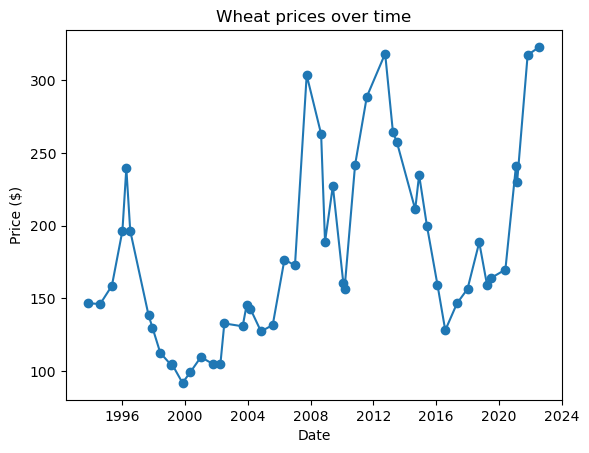

In [3]:
# Create a line plot of wheat prices over time here
plt.plot(prices["Week"], prices["Wheat"], "-o");
plt.ylabel("Price ($)");
plt.xlabel("Date");
plt.title("Wheat prices over time");


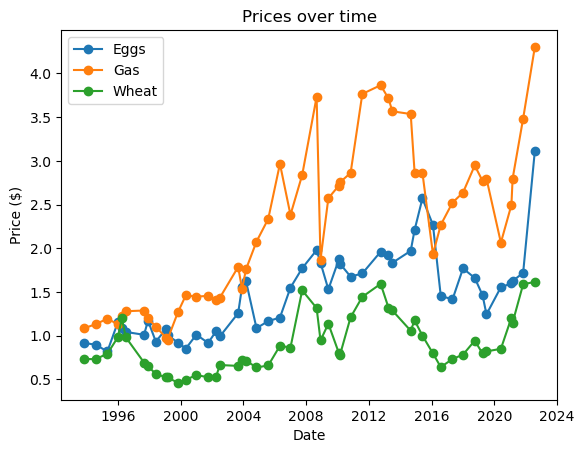

In [11]:
# Create line plots comparing egg, gas, and wheat prices 

plt.plot(prices["Week"], prices["Eggs"], "-o", label = "Eggs");
plt.plot(prices["Week"], prices["Gas"], "-o", label = "Gas");
plt.plot(prices["Week"], prices["Wheat"]/200, "-o", label = "Wheat (10 lbs)");

plt.ylabel("Price ($)");
plt.xlabel("Date");
plt.title("Prices over time");
plt.legend();


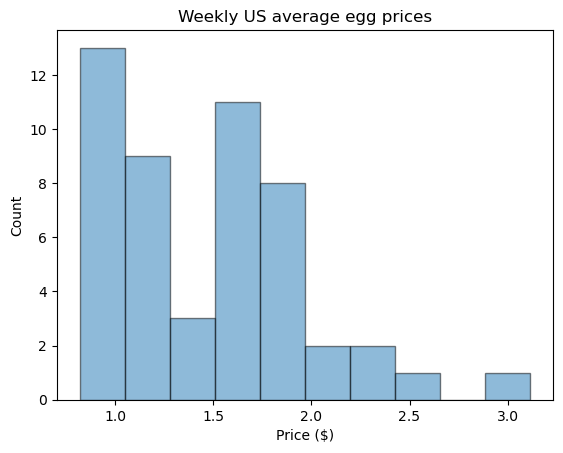

In [8]:
# Creat a histogram of egg prices

plt.hist(prices["Eggs"], edgecolor = "black", bins = 10, alpha = .5);
plt.xlabel("Price ($)");
plt.ylabel("Count");
plt.title("Weekly US average egg prices");


### Boxplots

Boxplots are a visualization of the 5 number summary which is: min, Q1, median, Q3 and max (where Q1 is the 25th quantile, and Q3 is the 75h quantile). 

We can get quantiles using `np.quantile(ndarray, proportion)`.

We can create boxplots using the `plt.boxplot()` function. 


In [57]:
# Can you calculate the 5 number summary for the egg prices? 

# get Q1, median, Q3
print(np.quantile(prices["Eggs"], [.25, .5, .75]))

# another way to get the median
print(np.median(prices["Eggs"]))

# get the min and max
print(np.min(prices["Eggs"]))
print(np.max(prices["Eggs"]))


[1.05475 1.496   1.7705 ]
1.496
0.819
3.116


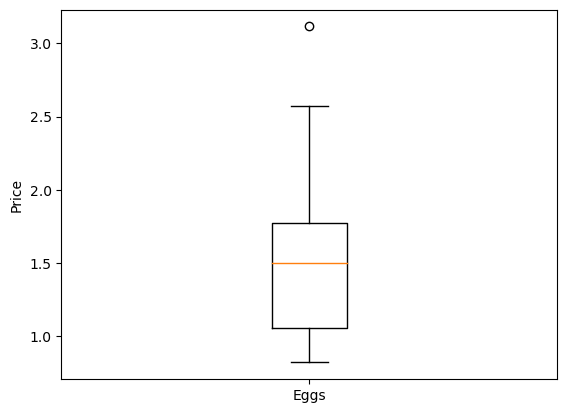

In [5]:
# boxplot of egg prices
plt.boxplot(prices["Eggs"], labels = ["Eggs"]);
plt.ylabel("Price");

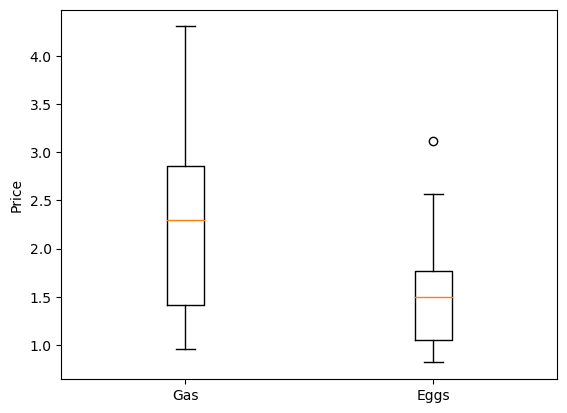

In [9]:
# creating side-by-side boxplots by passing a list of the different data sets to compare

plt.boxplot([prices["Gas"], prices["Eggs"]], labels = ["Gas", "Eggs"]);
plt.ylabel("Price");

### Scatter plots

We can create a simple scatter plots using: `plt.plot()`

For more complex scatter plots we can use: `plot.scatter()`

Let's start by looking at the simple `plt.plot()`

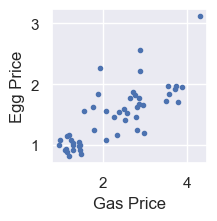

In [58]:
# Create a basic scatter plot of Egg prices vs. Gas prices using plt.plot()

plt.plot(prices["Gas"], prices["Eggs"], ".");
plt.xlabel("Gas Price");
plt.ylabel("Egg Price");


Let's now create a DataFrame called `prices2` which is the same as our `prices` DataFrame but it also has an additional column called `after2000`. We will use this column to plots points before the year 2000 in a different color than points after 2000. 

In particular, the `after2000` column should be set to the string "red" for points that occur before 2000 and to the string "green" for points that occured after 2000. 


In [16]:
# Add a column called "after2000" which has values that are 
# "red" is years after 2000,  "green" is years before 2000

prices2 = prices.copy()

prices2["after2000"] = "red"
prices2.loc[12:, "after2000"] = "green"

prices2.head()

,Week,Eggs,Gas,Wheat,after2000
0,1993-11-01,0.917,1.084,146.501602,red
1,1994-08-01,0.895,1.130,146.024124,red
2,1995-05-01,0.819,1.194,158.611557,red
3,1996-01-01,1.155,1.129,196.428302,red
4,1996-04-01,1.086,1.223,239.516216,red


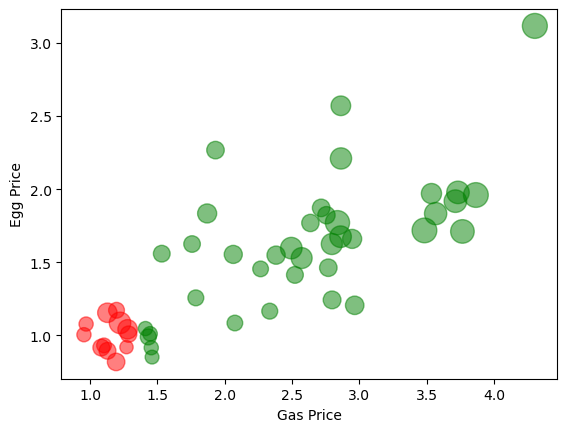

In [71]:
# Create a fancier scatter plot of Egg prices vs. Gas prices using plt.scatter()
plt.scatter(prices2["Gas"], prices2["Eggs"], 
            s = prices2["Wheat"], 
            color = prices2["after2000"], 
            alpha = .5);

plt.xlabel("Gas Price");
plt.ylabel("Egg Price");

### Bar plots and pie charts

We can plot *categorical data* using bar plots and pie charts. 

To create bar plots we can use: `plt.bar()`

To create pie charts we can use: `plt.pie()`


In [10]:
nba_salaries = pd.read_csv("nba_salaries_2015_16.csv")

nba_salaries.head(3)

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250


Start by creating a DataFrame called `position_counts` that has the following columns: 

1. `POSTION`: The postion (abbreviation) for each of the 5 positions
2. `num_players`: Thhe number of players at each position.




In [11]:
position_counts = nba_salaries.groupby("POSITION").agg(num_players = ("PLAYER", "count")).reset_index()
position_counts

,POSITION,num_players
0,C,69
1,PF,85
2,PG,85
3,SF,82
4,SG,96


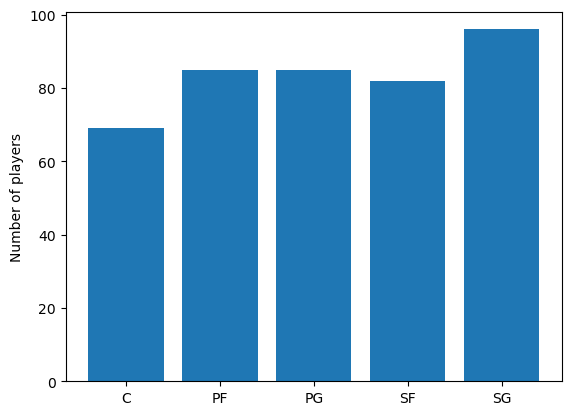

In [13]:
# Create a bar plot of the number of basketball players at each position
plt.bar(position_counts["POSITION"], position_counts["num_players"]);
plt.ylabel("Number of players");

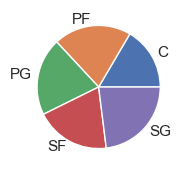

In [59]:
# Create a pie chart of the number of basketball players at each position

plt.pie(position_counts["num_players"], labels= position_counts["POSITION"]);


### Subplot: the pyplot interface

There are two ways to create subplots in matplotlib using either:

1. The pyplot interface
2. The axes interface

To create subplots using the pyplot interface we can use the `subplot` function:

`plt.subplot(num_rows, num_cols, curr_plot_num);`
`plt.plot(x, y);`


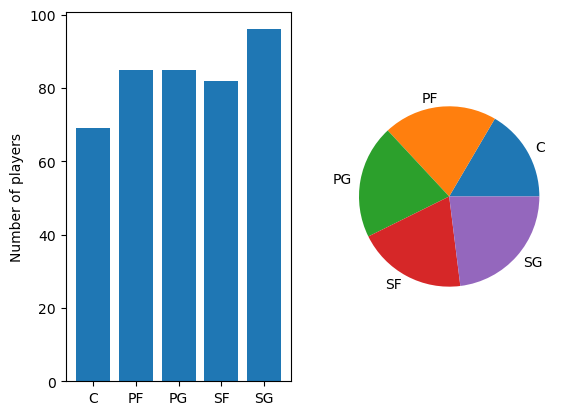

In [14]:
# subplots
plt.subplot(1, 2, 1);
plt.bar(position_counts["POSITION"], position_counts["num_players"]);
plt.ylabel("Number of players");

plt.subplot(1, 2, 2);
plt.pie(position_counts["num_players"], labels= position_counts["POSITION"]);


### Subplot: the axes interface

To create subplots using the axes interface we can use the `subplots` function:

`fig, ax = plt.subplot(num_rows, 1, 2);`
`ax[0].plot(x, y);`

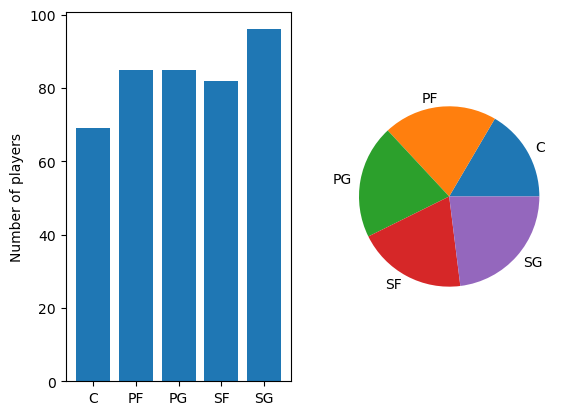

In [15]:
# Alternatively

# subplots
fig, ax = plt.subplots(1, 2);
ax[0].bar(position_counts["POSITION"], position_counts["num_players"]);
ax[0].set_ylabel("Number of players");

ax[1].pie(position_counts["num_players"], labels= position_counts["POSITION"]);



<br>
<br>
<br>
<br>
<br>


![piechart](http://i.imgur.com/wsVTukr.jpg)


## Seaborn!

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

I.e., it is built on top of of matplotlib but produces better looking plots that are easier to create. 

Let's start by examining different themes which can produce better looking plots. We can do this using the `sns.set_theme()` method. 


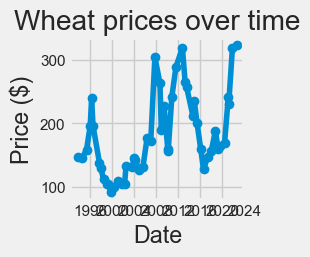

In [62]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()   # default style is 'darkgrid')
#sns.set_theme(style='whitegrid')

# Side note: Matplotlib also has themes
# plt.style.available
# plt.style.use('fivethirtyeight')


# Re-create a line plot of wheat prices over time here
plt.plot(prices["Week"], prices["Wheat"], "-o");
plt.ylabel("Price ($)");
plt.xlabel("Date");
plt.title("Wheat prices over time");

### Plotting relationships between two quantitative variables

We can plot relationships between two quantitative variables using the `sns.relplot()` function


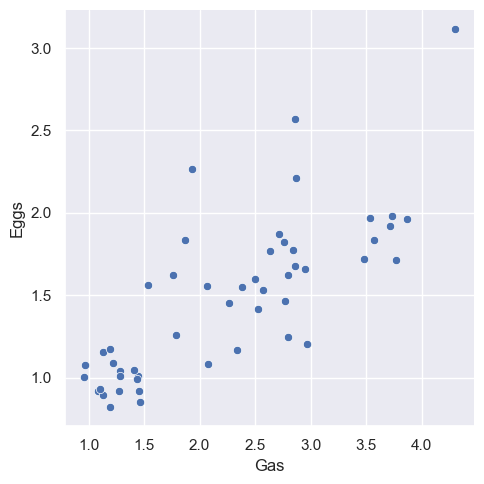

In [23]:
# plot relationship between gas and egg prices
sns.relplot(data = prices, x = "Gas", y = "Eggs");

#### Penguins!

Let's continue to explore the relplot using data on penguins. 

We will also look at mapping other features of our data onto visual properties including: 
- `x`, and `y` column names to be plotted (as we have done before)
- `hue`: The column name to be mapped to the color of the points
- `size`: The column name to be mapped to the size of points
- `style`: The column name to be mapped to the style of the markers
- `col`: fThe column name to be mapped to faceting to compare multiple subplots


In [63]:
# Let's look at some penguins
penguins = sns.load_dataset("penguins")

print(type(penguins))

penguins.head()


<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


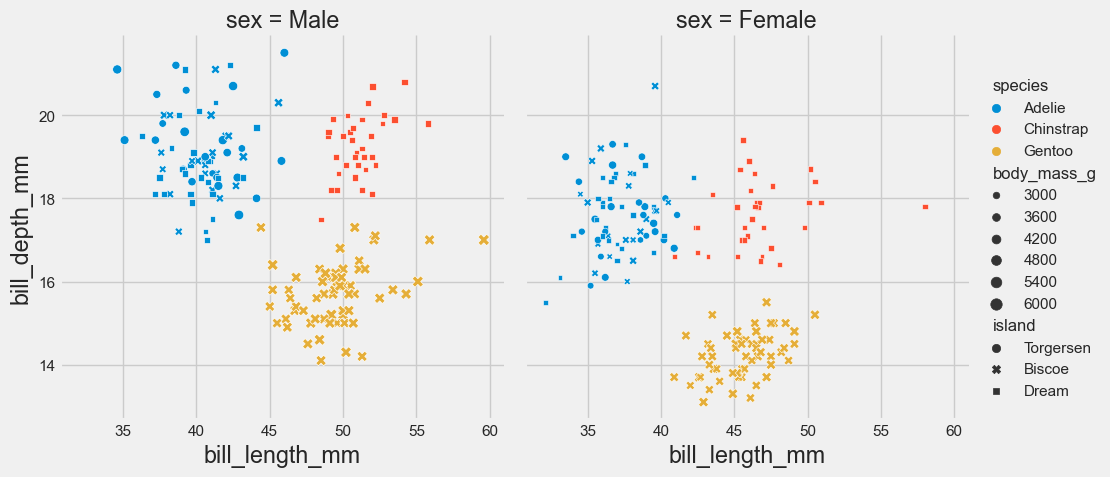

In [64]:
# plotting bill size on x, and y axes and other properties
sns.relplot(data = penguins, 
            x = "bill_length_mm", 
            y = "bill_depth_mm",
            hue = "species",
            size = "body_mass_g",
            style = "island",
            col = "sex");

### Plotting a single quantitative variable

We can plot a single quantitative variables using the `sns.displot()` function.

Properties we can set include
- `x`: The name of the data column you want to plot
- `hue`: The name of the column that colors each point
- `kind` The type of plot

Different options for `kind` are: “hist”, “kde”, “ecdf”


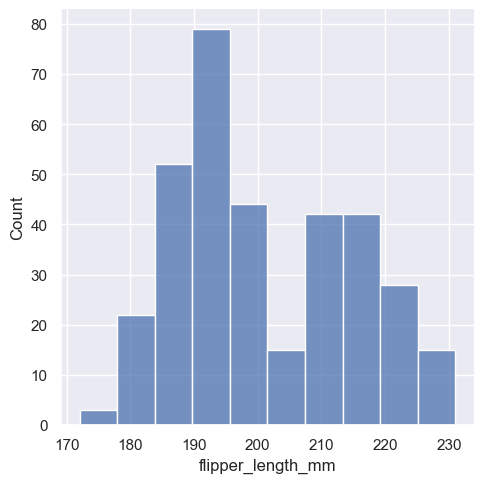

In [38]:
# plot the flipper length
sns.displot(data = penguins, 
            x="flipper_length_mm", 
            #hue="species", 
            kind="hist");

### Plotting a quantitative variable for different categorical variable levels

We can plot a quantitative variable for different categorical variable levels using the `sns.catplot()` function.

We specify: 
- `x`: Cateogoral x-value column name
- `y`: Quantitative y-value column name
- `kind`: The type of plot

The `kind` argument can be set to the following: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”


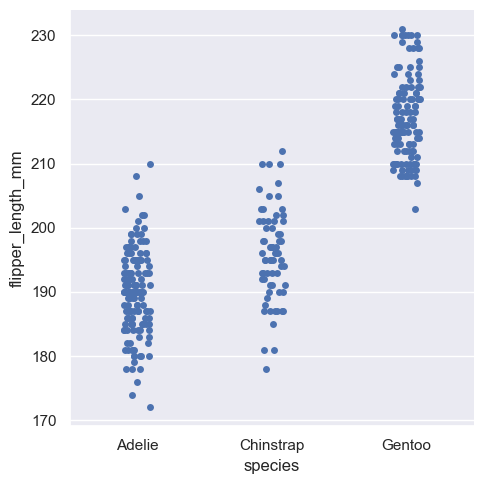

In [51]:
# plot flipper length for the different species using different kinds of plots
sns.catplot(data = penguins, 
            x = "species", 
            y = "flipper_length_mm", 
            kind = "strip");

# also try “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, or “bar”

<img src = "https://i.imgflip.com/1ezfdq.jpg">